In [1]:
import numpy as np
import pandas as pd

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Generate 1000 samples
n_samples = 1000
protocols = ["IEEE 802.15.4", "5G NR", "6G OTFS"]

data = {
    "RF_Fingerprint": np.random.uniform(0, 1, n_samples),
    "CSI_Amplitude": np.random.uniform(0, 1, n_samples),
    "CSI_Phase": np.random.uniform(-np.pi, np.pi, n_samples),
    "Protocol": np.random.choice(protocols, n_samples),
    "Sequence_Delta": np.random.uniform(0, 10, n_samples),
    "Noise_Level": np.random.uniform(0, 1, n_samples),
    "Authenticity": np.random.randint(0, 2, n_samples),
    "Threat_Type": np.random.randint(0, 4, n_samples)
}

In [4]:
# Simulate realistic patterns (e.g., spoofed devices have higher sequence delta)
for i in range(n_samples):
    if data["Authenticity"][i] == 0:  # Spoofed
        data["Sequence_Delta"][i] += np.random.uniform(2, 5)  # Higher delta
    if data["Threat_Type"][i] == 1:  # Jamming
        data["Noise_Level"][i] = np.random.uniform(0.7, 1)  # High noise

In [5]:
# Create DataFrame
df = pd.DataFrame(data)

In [6]:
# Save to CSV for Kaggle
df.to_csv("/kaggle/working/wiot_security_data.csv", index=False)
print(df.head())

   RF_Fingerprint  CSI_Amplitude  CSI_Phase       Protocol  Sequence_Delta  \
0        0.374540       0.185133  -1.497247        6G OTFS        6.263224   
1        0.950714       0.541901  -1.589779  IEEE 802.15.4        5.948883   
2        0.731994       0.872946   2.552573  IEEE 802.15.4        8.529820   
3        0.598658       0.732225  -1.573648        6G OTFS        9.283835   
4        0.156019       0.806561  -1.432882          5G NR       14.351878   

   Noise_Level  Authenticity  Threat_Type  
0     0.793063             1            2  
1     0.981242             0            0  
2     0.932489             1            0  
3     0.933866             1            3  
4     0.402224             0            3  


In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [8]:
# Load data
df = pd.read_csv("/kaggle/working/wiot_security_data.csv")

In [9]:
# Encode categorical 'Protocol'
le = LabelEncoder()
df["Protocol"] = le.fit_transform(df["Protocol"])

In [10]:
# Separate features and labels
X = df.drop(["Authenticity", "Threat_Type"], axis=1)
y_auth = df["Authenticity"]  # Binary classification
y_threat = df["Threat_Type"]  # Multiclass classification

In [11]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Split data (80% train, 20% test)
X_train, X_test, y_auth_train, y_auth_test, y_threat_train, y_threat_test = train_test_split(
    X_scaled, y_auth, y_threat, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (800, 6)
Test set shape: (200, 6)


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics
print(df.describe())

       RF_Fingerprint  CSI_Amplitude    CSI_Phase     Protocol  \
count     1000.000000    1000.000000  1000.000000  1000.000000   
mean         0.490257       0.507017     0.015116     0.995000   
std          0.292137       0.292190     1.826360     0.812179   
min          0.004632       0.003218    -3.141520     0.000000   
25%          0.235973       0.241074    -1.499476     0.000000   
50%          0.496807       0.518734     0.003857     1.000000   
75%          0.744320       0.760465     1.627995     2.000000   
max          0.999718       0.999414     3.127901     2.000000   

       Sequence_Delta  Noise_Level  Authenticity  Threat_Type  
count     1000.000000  1000.000000   1000.000000  1000.000000  
mean         6.518556     0.589575      0.502000     1.520000  
std          3.395598     0.293381      0.500246     1.108526  
min          0.013463     0.001644      0.000000     0.000000  
25%          3.894533     0.336911      0.000000     1.000000  
50%          6.434137

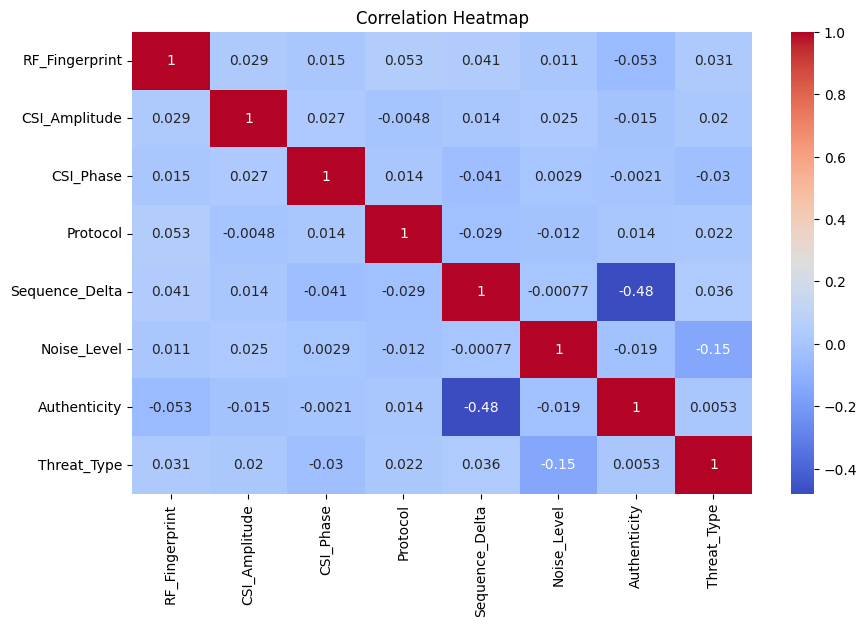

In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

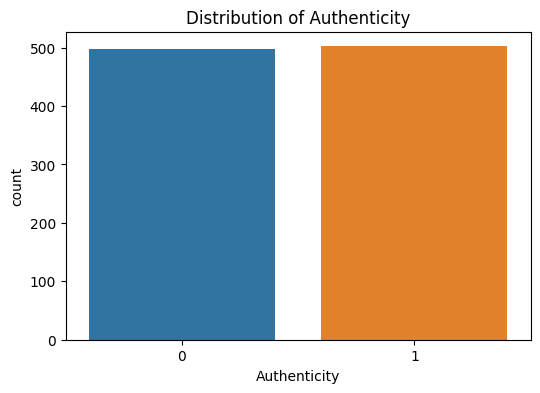

In [15]:
# Distribution of Authenticity
plt.figure(figsize=(6, 4))
sns.countplot(x="Authenticity", data=df)
plt.title("Distribution of Authenticity")
plt.show()

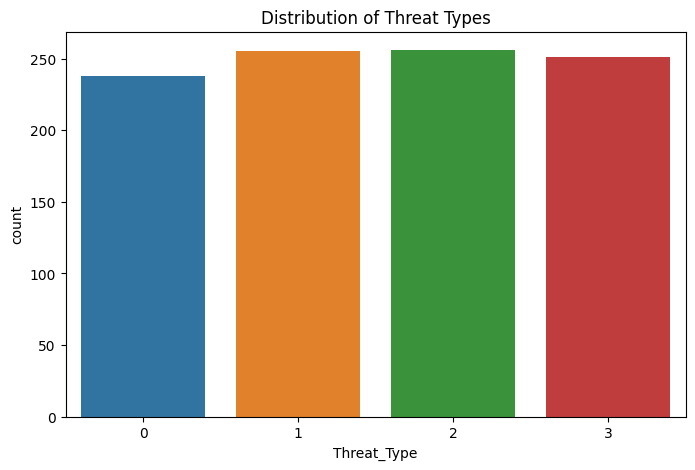

In [16]:
# Distribution of Threat Types
plt.figure(figsize=(8, 5))
sns.countplot(x="Threat_Type", data=df)
plt.title("Distribution of Threat Types")
plt.show()

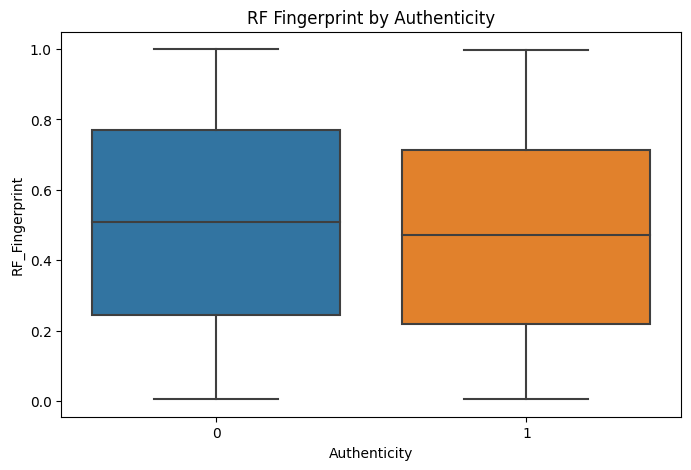

In [17]:
# Boxplot of RF_Fingerprint by Authenticity
plt.figure(figsize=(8, 5))
sns.boxplot(x="Authenticity", y="RF_Fingerprint", data=df)
plt.title("RF Fingerprint by Authenticity")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

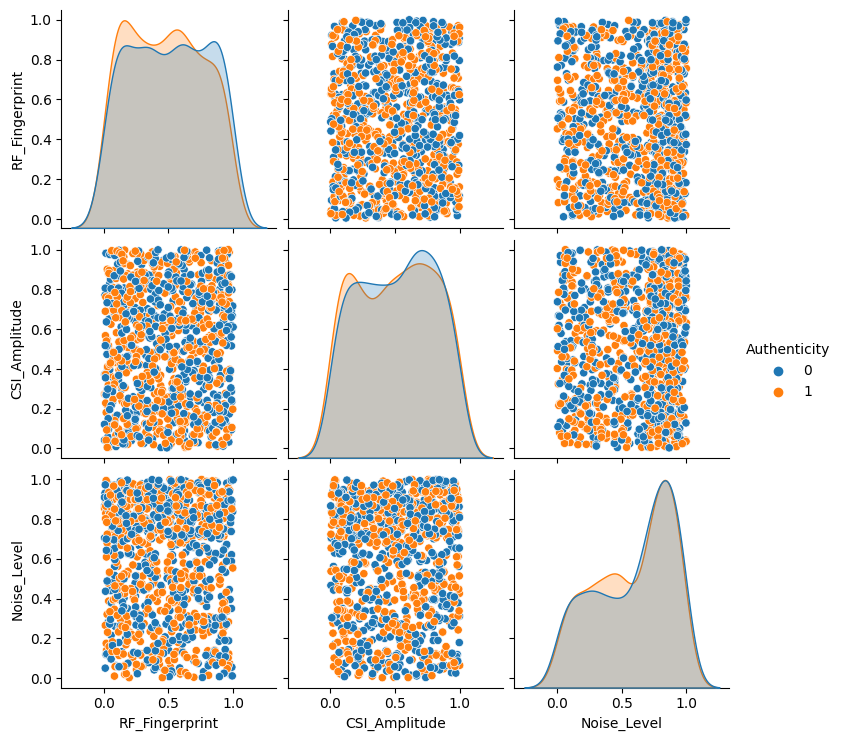

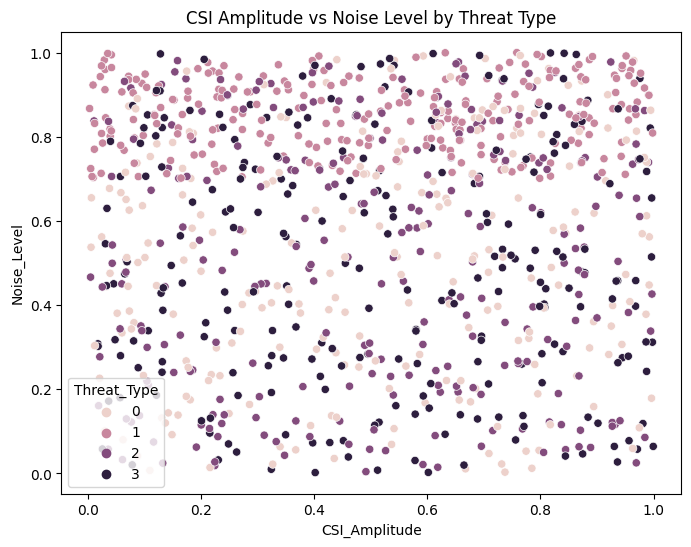

In [18]:
# Pairplot for numerical features
sns.pairplot(df[["RF_Fingerprint", "CSI_Amplitude", "Noise_Level", "Authenticity"]], hue="Authenticity")
plt.show()

# Scatter plot: CSI_Amplitude vs Noise_Level by Threat_Type
plt.figure(figsize=(8, 6))
sns.scatterplot(x="CSI_Amplitude", y="Noise_Level", hue="Threat_Type", data=df)
plt.title("CSI Amplitude vs Noise Level by Threat Type")
plt.show()

In [21]:
 pip install -U scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 18.1 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import skfuzzy.control as ctrl
import numpy as np

In [23]:
# Reshape data for CNN (add a dimension for 1D convolution)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 1. CNN Model
cnn_model = Sequential([
    Conv1D(32, 2, activation="relu", input_shape=(X_train_cnn.shape[1], 1)),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")  # Binary output for Authenticity
])
cnn_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
cnn_model.fit(X_train_cnn, y_auth_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5595 - loss: 0.6767 - val_accuracy: 0.7375 - val_loss: 0.5766
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6375 - loss: 0.6170 - val_accuracy: 0.7375 - val_loss: 0.5210
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6684 - loss: 0.5851 - val_accuracy: 0.7250 - val_loss: 0.5047
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6247 - loss: 0.5908 - val_accuracy: 0.7250 - val_loss: 0.5040
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6554 - loss: 0.5666 - val_accuracy: 0.7250 - val_loss: 0.4971
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6494 - loss: 0.5709 - val_accuracy: 0.7250 - val_loss: 0.4960
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6638 - loss: 0.5757 - val_accuracy: 0.7375 - val_loss: 0.4951
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6412 - loss: 0.5799 - val_accuracy: 0.7312 - val_loss

In [24]:
# CNN Predictions
cnn_pred = (cnn_model.predict(X_test_cnn) > 0.5).astype(int)
cnn_acc = accuracy_score(y_auth_test, cnn_pred)
print("CNN Accuracy:", cnn_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
CNN Accuracy: 0.66


In [25]:
# 2. Metaheuristics (Simulated RL via Genetic Algorithm for Threshold Optimization)
from deap import base, creator, tools, algorithms

# Define fitness function (maximize accuracy)
def evaluate_threshold(individual):
    threshold = individual[0]
    pred = (cnn_model.predict(X_test_cnn) > threshold).astype(int)
    return accuracy_score(y_auth_test, pred),

In [26]:
# Set up Genetic Algorithm
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)
toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", evaluate_threshold)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [27]:
# Run GA
population = toolbox.population(n=50)
for gen in range(10):
    offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.2)
    fits = toolbox.map(toolbox.evaluate, offspring)
    for fit, ind in zip(fits, offspring):
        ind.fitness.values = fit
    population = toolbox.select(offspring, k=len(population))

best_threshold = tools.selBest(population, k=1)[0][0]
meta_pred = (cnn_model.predict(X_test_cnn) > best_threshold).astype(int)
meta_acc = accuracy_score(y_auth_test, meta_pred)
print("Metaheuristics Optimized Accuracy:", meta_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
7/7 ━━━━━━━━

In [29]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define the antecedent and consequent
authenticity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), "authenticity")
threat = ctrl.Consequent(np.arange(0, 1.1, 0.1), "threat")

# Define membership functions using fuzz.trimf
authenticity["low"] = fuzz.trimf(authenticity.universe, [0, 0, 0.5])
authenticity["high"] = fuzz.trimf(authenticity.universe, [0.5, 1, 1])
threat["low"] = fuzz.trimf(threat.universe, [0, 0, 0.5])
threat["high"] = fuzz.trimf(threat.universe, [0.5, 1, 1])

In [30]:
# Rules
rule1 = ctrl.Rule(authenticity["high"], threat["low"])
rule2 = ctrl.Rule(authenticity["low"], threat["high"])

In [31]:
# Control system
fuzzy_ctrl = ctrl.ControlSystem([rule1, rule2])
fuzzy_sim = ctrl.ControlSystemSimulation(fuzzy_ctrl)

In [32]:
# Apply Fuzzy Logic to CNN predictions
fuzzy_pred = []
for pred in cnn_model.predict(X_test_cnn):
    fuzzy_sim.input["authenticity"] = pred
    fuzzy_sim.compute()
    fuzzy_pred.append(1 if fuzzy_sim.output["threat"] < 0.5 else 0)
fuzzy_acc = accuracy_score(y_auth_test, fuzzy_pred)
print("Fuzzy Logic Accuracy:", fuzzy_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Fuzzy Logic Accuracy: 0.66


In [33]:
# 4. Baseline Models
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_auth_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_auth_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

Random Forest Accuracy: 0.68


In [34]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_auth_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_auth_test, lr_pred)
print("Logistic Regression Accuracy:", lr_acc)

Logistic Regression Accuracy: 0.665


In [35]:
# Comparison
print("\nModel Comparison:")
print(f"CNN: {cnn_acc:.4f}")
print(f"Metaheuristics (GA): {meta_acc:.4f}")
print(f"Fuzzy Logic: {fuzzy_acc:.4f}")
print(f"Random Forest: {rf_acc:.4f}")
print(f"Logistic Regression: {lr_acc:.4f}")


Model Comparison:
CNN: 0.6600
Metaheuristics (GA): 0.7150
Fuzzy Logic: 0.6600
Random Forest: 0.6800
Logistic Regression: 0.6650


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


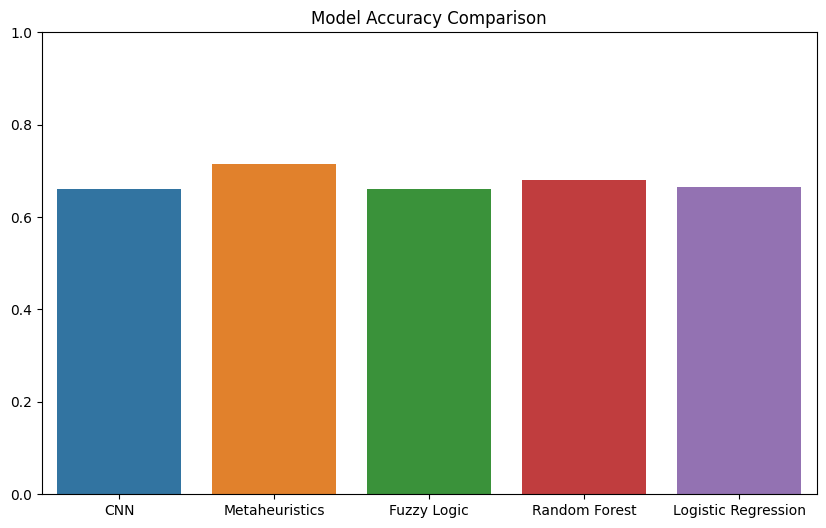

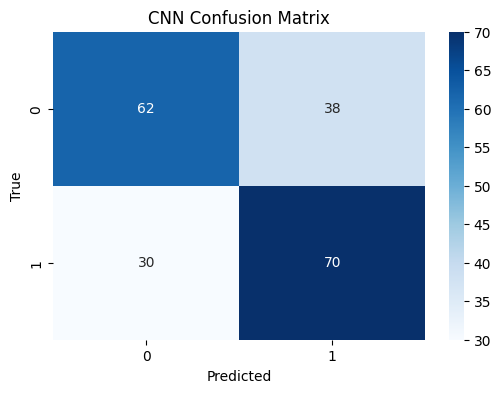

In [36]:
# Bar plot of model accuracies
models = ["CNN", "Metaheuristics", "Fuzzy Logic", "Random Forest", "Logistic Regression"]
accuracies = [cnn_acc, meta_acc, fuzzy_acc, rf_acc, lr_acc]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

# Confusion Matrix for CNN
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_auth_test, cnn_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()